In [151]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# A bandit gives a random reward from a particular Gaussian distribution.
class Bandit:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def sample(self):
        return np.random.normal(self.mean, self.std)

In [145]:
class MultiArmedBandit:
    def __init__(self, num_arms=2, means=None, stds=1):
        if means is None:
            self.means = np.random.uniform(0, 5, num_arms)
        else:
            self.means = means
        if stds is None:
            self.stds = np.random.uniform(0, 3, num_arms)
        else:
            self.stds = stds
        self.bandits = [Bandit(mean, std) for mean, std in zip(self.means, self.stds)]
        self.arms_pulled = np.zeros(num_arms, dtype=int)
        self.arms_rewards = np.zeros(num_arms)
        self.arms_rewards_avg = np.zeros(num_arms)
        self.num_arms = num_arms
        self.actions = np.arange(0, num_arms)
        self.epsilon_strategy_used = 0
        
        self.optimal_action_reward = np.max(self.means)
        self.regrets = []
        
        
    def reset(self):
        self.__init__(self.num_arms, self.means, self.stds)
        
    def get_greedy_action(self):
        return np.argmax(self.arms_rewards_avg)
        
    def action_selection(self, strategy="epsilon_greedy", eps=None):
        if strategy == "epsilon_greedy":
            assert eps is not None
            greedy_prob = eps + 1.0*(1-eps)/self.num_arms
            action_probs = [(1-greedy_prob)/self.num_arms]*self.num_arms
            action_probs[self.get_greedy_action()] = greedy_prob
            action_probs[-1] += 1.0 - np.sum(action_probs)
            
            selected_action = np.random.choice(self.actions, p=action_probs)
            if selected_action == self.get_greedy_action():
                self.epsilon_strategy_used += 1
            return selected_action
            
        
    def sample(self, action):
        reward = self.bandits[action].sample()
        self.arms_pulled[action] += 1
        self.arms_rewards[action] += reward
        self.arms_rewards_avg[action] = 1.0*self.arms_rewards[action]/self.arms_pulled[action]
        
        self.regrets.append(self.optimal_action_reward - self.means[action])
        return reward
    
    def get_state(self):
        return self.arms_rewards, self.arms_pulled, self.arms_rewards_avg
    
    def get_regret_cumsum(self):
        return np.cumsum(self.regrets)

## Epsilon greedy approach

In [211]:
### ToDo: Repeat the experiment with each value of epsilon to evaluate the expected value of L(t)

In [212]:
num_arms = 5
means = np.random.uniform(0, 6, num_arms) 
stds = [1]*num_arms

strategy="epsilon_greedy"
num_experiments = 100
num_iterations = 1000
eps_values = 0.5 + 0.1 * np.arange(0, 5)

expected_regret_cumsum_values = dict()

multi_bandit = MultiArmedBandit(num_arms=num_arms, means=means, stds=stds)

for eps in eps_values:
    all_exps_regret_cumsum = []
    for num_exp in range(1, num_experiments+1):
        for i in range(num_iterations):
            multi_bandit.sample(multi_bandit.action_selection(strategy=strategy, eps=eps))

            expected_regret_cumsum_values[eps] = multi_bandit.get_regret_cumsum()
            
#         if num_exp == 1:
#             new_expected_regret_cumsum = new_regret_cumsum
#         else:
#             new_expected_regret_cumsum = [1.0*(old_mean*(num_exp-1) + new_val)/num_exp for new_val, 
#                                           old_mean in zip(new_regret_cumsum, 
#                                                           expected_regret_cumsum_values[eps])]
            
        multi_bandit.reset()

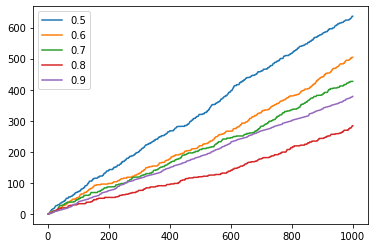

In [213]:
for key, value in regret_cumsum_values.items():
    plt.plot(np.arange(1, num_iterations+1), value, label=key)
    
plt.legend()

In [ ]:
plt